<a href="https://colab.research.google.com/github/AliMousa11/computer-vision/blob/main/corner-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def get_susan_scores(img_path, t):

    img = cv2.imread(img_path)
    if img is None:
        raise ValueError(f"Image not found at {img_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    row_count, col_count = gray.shape
    mask = np.array([
        [0, 0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 0, 0]
    ], dtype=np.float32)
    pad = 3
    padded_img = np.pad(gray, ((pad, pad), (pad, pad)), mode='symmetric').astype(np.float32)
    score_map = np.zeros_like(gray, dtype=np.float32)

    if t == 0: t = 1

    for i in range(row_count):
        for j in range(col_count):
            roi = padded_img[i:i+7, j:j+7]
            nucleus_val = roi[3, 3]
            diff_ratio = (roi - nucleus_val) / t
            c_m = np.exp(-np.power(diff_ratio, 6))
            c_m = c_m * mask
            n = np.sum(c_m)
            score_map[i, j] = n
    histogram_array, bin_edges = np.histogram(score_map.flatten(), bins=100, range=(0, 37))
    return score_map, histogram_array

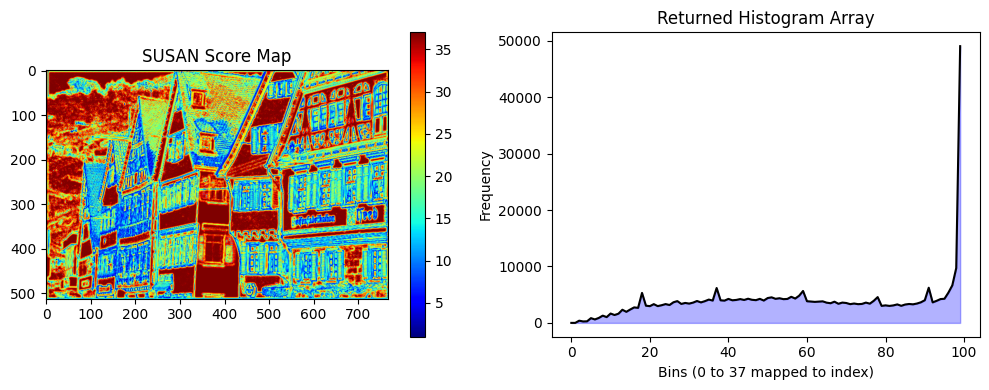

Success! Returned histogram shape: (100,)
Example values: [   0    0  391  256  279  840  612  881 1287 1027]


In [3]:
try:
    input_image_path = 'Test Image.png' # Replace with your image
    t_parameter = 20

    # Now retrieving the histogram directly from the function
    scores, hist_array = get_susan_scores(input_image_path, t_parameter)

    # Visualization
    plt.figure(figsize=(10, 4))

    # Plot the Score Map
    plt.subplot(1, 2, 1)
    plt.imshow(scores, cmap='jet')
    plt.title("SUSAN Score Map")
    plt.colorbar()

    # Plot the returned Histogram Array
    plt.subplot(1, 2, 2)
    # We plot the array directly to verify it works
    plt.plot(hist_array, color='black')
    plt.fill_between(range(len(hist_array)), hist_array, color='blue', alpha=0.3)
    plt.title("Returned Histogram Array")
    plt.xlabel("Bins (0 to 37 mapped to index)")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    print(f"Success! Returned histogram shape: {hist_array.shape}")
    print("Example values:", hist_array[:10])

except Exception as e:
    print(f"Error: {e}")